# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('study_time_sheet_FINAL.csv')
df.head()

,initials,date,course_id,time(m),summary
0,TA,1/9/23,DS-160,15,"installed all needed software, started study t..."
1,TA,1/9/23,HONR-353H,69,"answered emails, finished Module 0, almost fin..."
2,TA,1/9/23,ECON-111,75,chapter 3 read and do hw
3,TA,1/10/23,BUSA-245,20,finished lab 1
4,TA,1/11/23,DS-160,30,finished assignment 1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   initials   27 non-null     object
 1   date       27 non-null     object
 2   course_id  27 non-null     object
 3   time(m)    27 non-null     int64 
 4   summary    27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
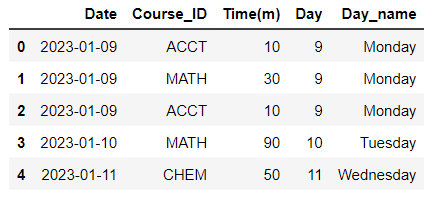

In [4]:
# Is there any column you want to drop? If yes which column and why?

df=df.drop(columns=['initials','summary'])
df.columns
cols=['Date', 'Course_ID', 'Time(m)']
df.columns=cols
df.head()

# initials column removed because it has 0 unique values. summary column removed, not useful for analysis.
# remaining column names corrected to match uppercase in example.

,Date,Course_ID,Time(m)
0,1/9/23,DS-160,15
1,1/9/23,HONR-353H,69
2,1/9/23,ECON-111,75
3,1/10/23,BUSA-245,20
4,1/11/23,DS-160,30


In [5]:
# Convert the date column to datetime

df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Course_ID,Time(m)
0,2023-01-09,DS-160,15
1,2023-01-09,HONR-353H,69
2,2023-01-09,ECON-111,75
3,2023-01-10,BUSA-245,20
4,2023-01-11,DS-160,30


In [6]:
# Calculate the day of the month and create a new column named 'Day'

df['Day']=df['Date'].dt.day
df.head()

,Date,Course_ID,Time(m),Day
0,2023-01-09,DS-160,15,9
1,2023-01-09,HONR-353H,69,9
2,2023-01-09,ECON-111,75,9
3,2023-01-10,BUSA-245,20,10
4,2023-01-11,DS-160,30,11


In [27]:
# Create a new column called Day_name using  .dt.day_name()

df['Day_name']=df['Date'].dt.day_name()
df.head()

,Date,Course_ID,Time(m),Day,Day_name
0,2023-01-09,DS-160,15,9,Monday
1,2023-01-09,HONR-353H,69,9,Monday
2,2023-01-09,ECON-111,75,9,Monday
3,2023-01-10,BUSA-245,20,10,Tuesday
4,2023-01-11,DS-160,30,11,Wednesday


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       27 non-null     datetime64[ns]
 1   Course_ID  27 non-null     object        
 2   Time(m)    27 non-null     int64         
 3   Day        27 non-null     int64         
 4   Day_name   27 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.2+ KB


### Answer the questions

In [29]:
# What is the average time you have spend for learning?

avgTIME=df['Time(m)'].mean()
avgTIME

45.51851851851852

In [11]:
# Display all of the entries where you have spent more than the average time to learn 

highTIME=df.loc[df['Time(m)'] > 46]
highTIME

,Date,Course_ID,Time(m),Day,Day_name
1,2023-01-09,HONR-353H,69,9,Monday
2,2023-01-09,ECON-111,75,9,Monday
8,2023-01-22,ECON-111,60,22,Sunday
9,2023-01-23,HONR-353H,90,23,Monday
10,2023-01-25,HONR-320H,90,25,Wednesday
12,2023-01-29,DS-160,55,29,Sunday
13,2023-01-29,ECON-111,55,29,Sunday
15,2023-02-02,HONR-353H,60,2,Thursday
22,2023-02-06,ECON-111,90,6,Monday
23,2023-02-07,BUSA-245,50,7,Tuesday


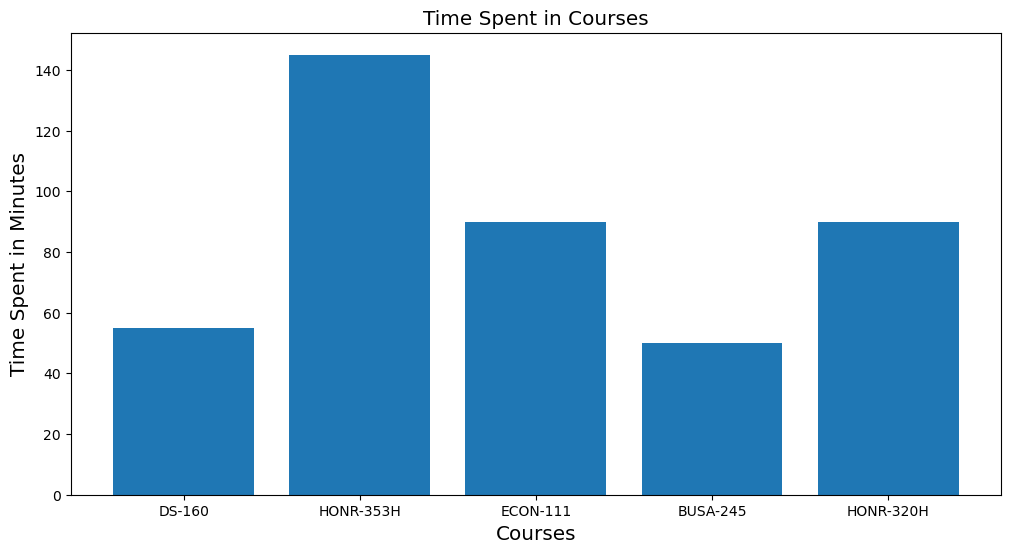

In [34]:
# Which course you have spent the maximum time to prepare?

plt.figure(figsize=(12,6))

plt.bar(df['Course_ID'],df['Time(m)'])
plt.xlabel('Courses',size='x-large')
plt.ylabel('Time Spent in Minutes',size='x-large')
plt.title('Time Spent in Courses',size='x-large')
plt.show()

# barplot shows the most time spent studying is devoted to HONR-353H which is my Honors Junior Research Mentorship.

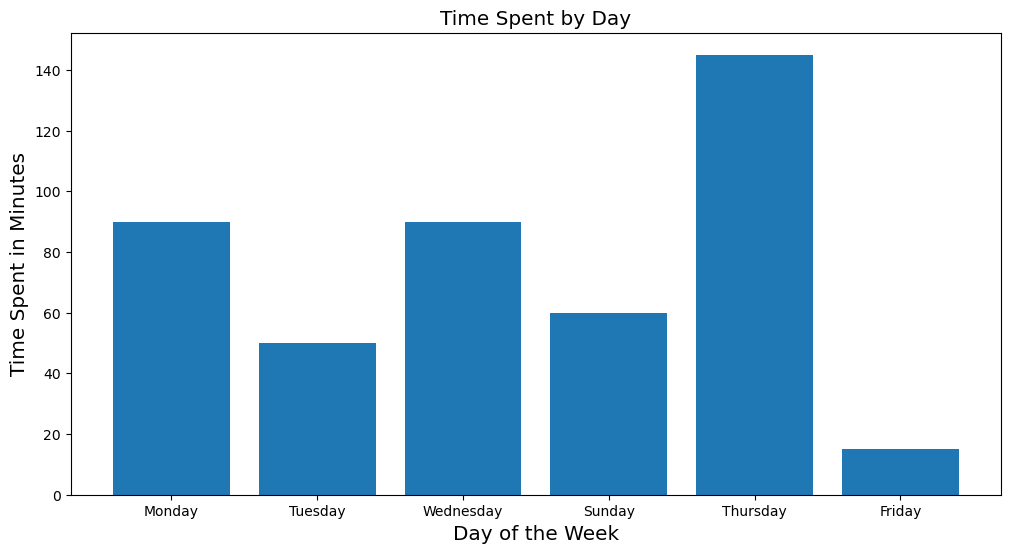

In [33]:
# Which day of the week you sepent most of the time?

plt.figure(figsize=(12,6))

plt.bar(df['Day_name'],df['Time(m)'])
plt.xlabel('Day of the Week',size='x-large')
plt.ylabel('Time Spent in Minutes',size='x-large')
plt.title('Time Spent by Day',size='x-large')
plt.show()

# barchart shows Thursday has the highest amount of time spent studying. 
# it outranks the other days by a lot - there is a large, influential outlier with a high time value on a thursday in the data set.

### Investigate the distribution of Time, adding the mean. How the data distributed?
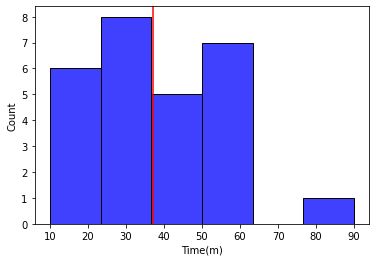

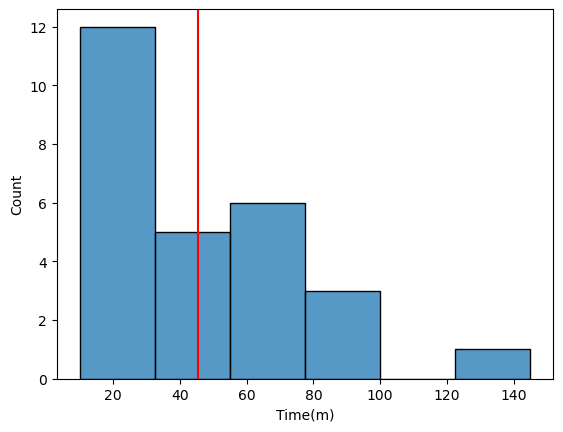

In [14]:
histplot=sns.histplot(data=df,x='Time(m)')

# calculating the mean
mean=df['Time(m)'].mean()

#ploting the mean
plt.axvline(mean, color='red')

plt.show()

##### The distribution of these data is right-skewed or positively skewed. This is because of the large outlier around 140.

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
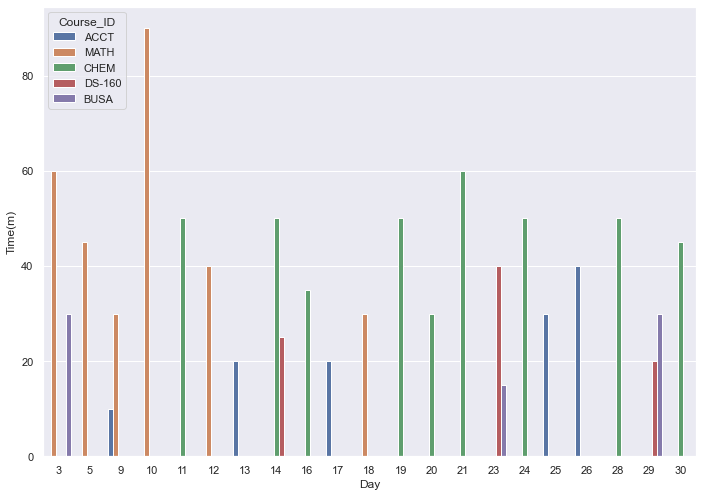

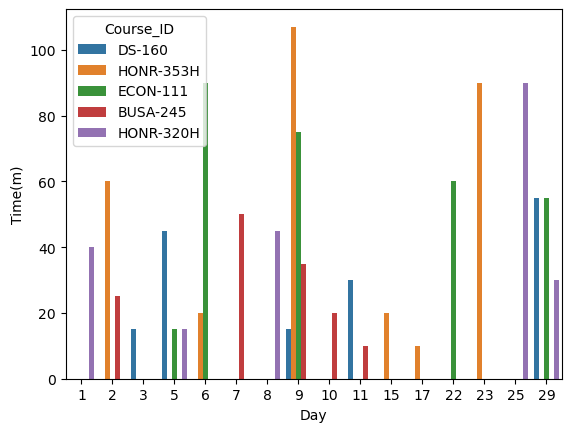

In [15]:
barplot=sns.barplot(x='Day', y='Time(m)',data=df,ci=False,hue='Course_ID')
# the large outlier is visible around day 9. there are several longer stretches of studying for ECON-111. the range of times entered is quite large.
# it appears that I worked small chunks - several tasks or sessions in one or two days and then breaks for several days on weekends or when I fell behind on my studies.

### Investigate the measure of dispersion (table and plot) of time column.
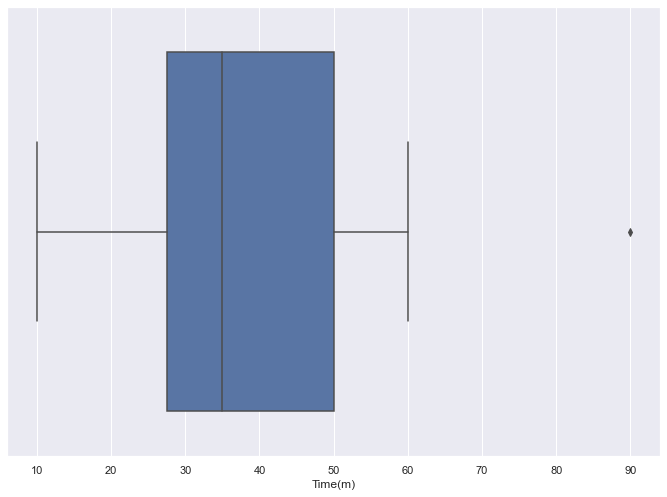

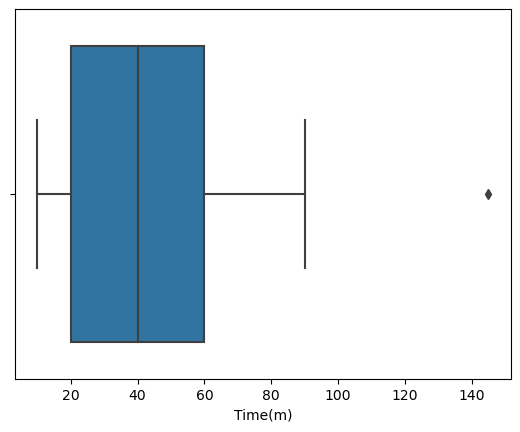

In [16]:
# measure of dispersion: plot
boxplot=sns.boxplot(data=df,x='Time(m)')

In [17]:
# measure of dispersion: table
df['Time(m)'].describe()

count     27.000000
mean      45.518519
std       32.295952
min       10.000000
25%       20.000000
50%       40.000000
75%       60.000000
max      145.000000
Name: Time(m), dtype: float64

In [18]:
# For the most part, the values of time range from 10 minutes to about 90 minutes. However, there is a large outlier at 145 which is shown on the plot by a small diamond. 

### Investigate the the distribution of time by Day_name
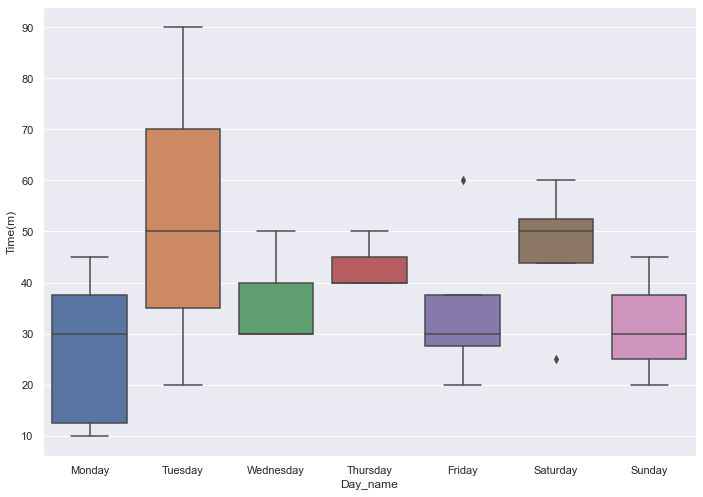

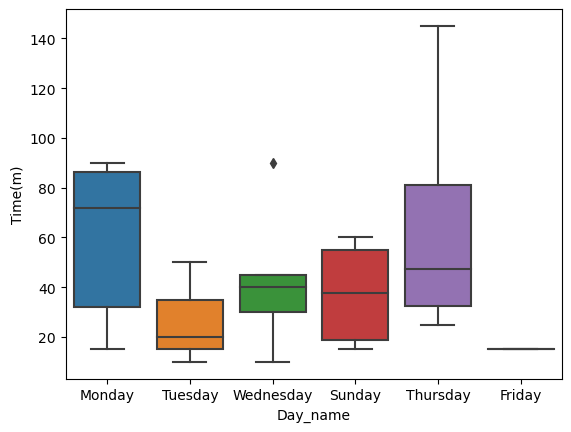

In [19]:
boxplot=sns.boxplot(x='Day_name',y='Time(m)',
                    data=df)

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
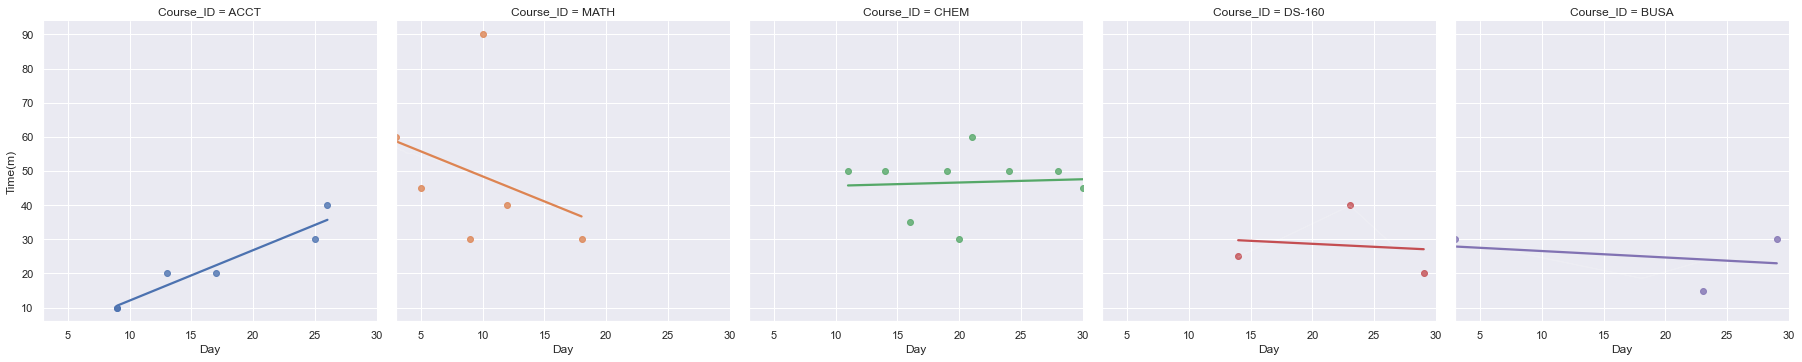

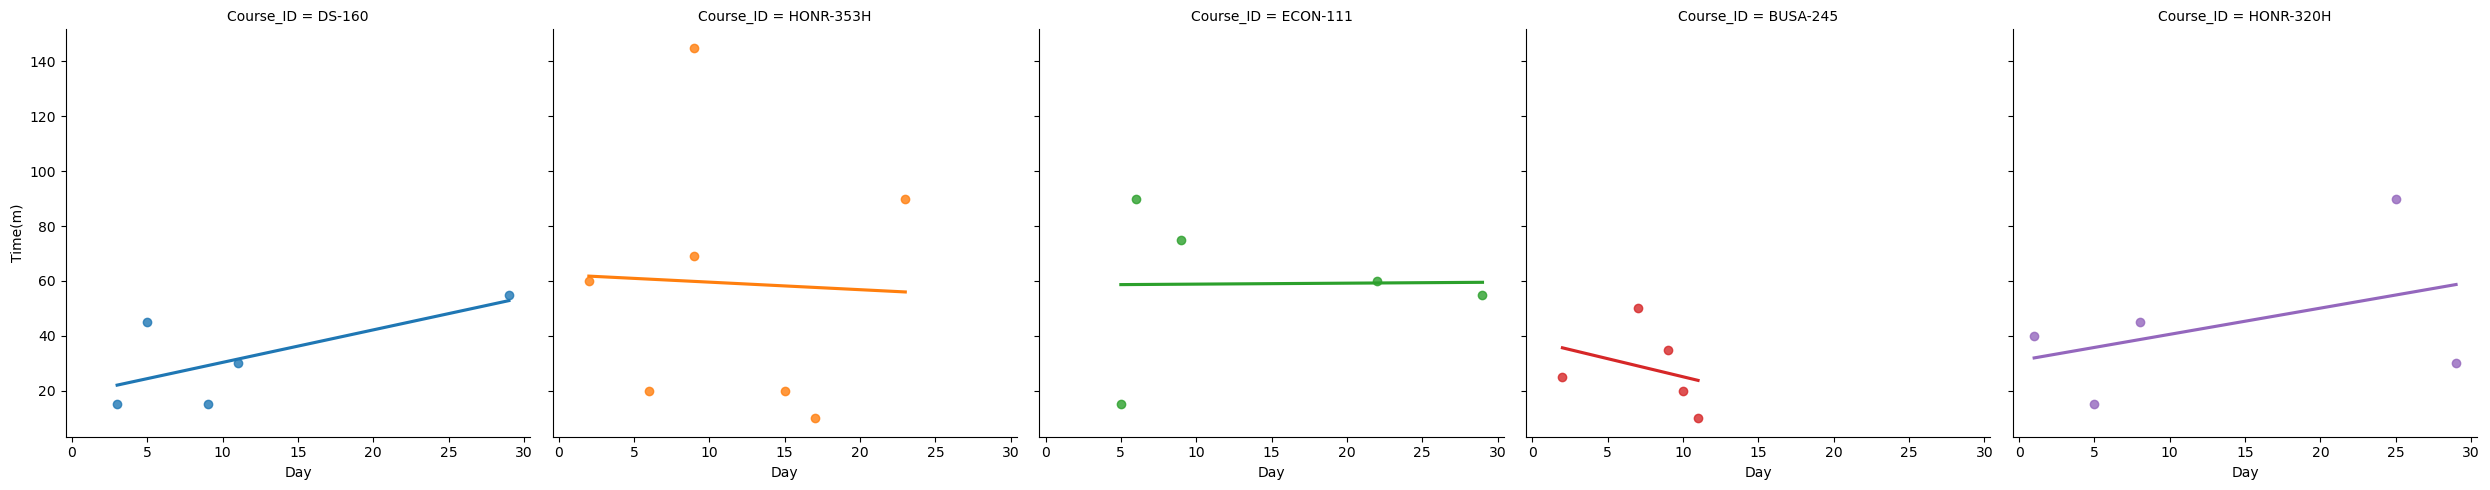

In [21]:
lmplot=sns.lmplot(data=df,
                  x='Day',
                  y='Time(m)',
                  ci=False,
                  hue='Course_ID',
                  col='Course_ID', )

### Create a pair plot of Day and Time and add course id as hue
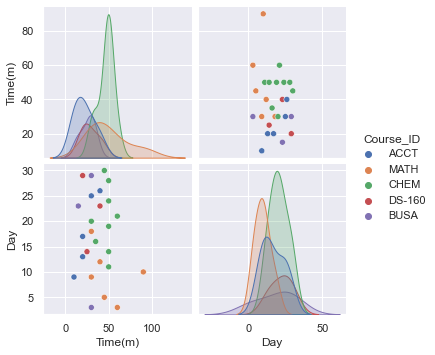

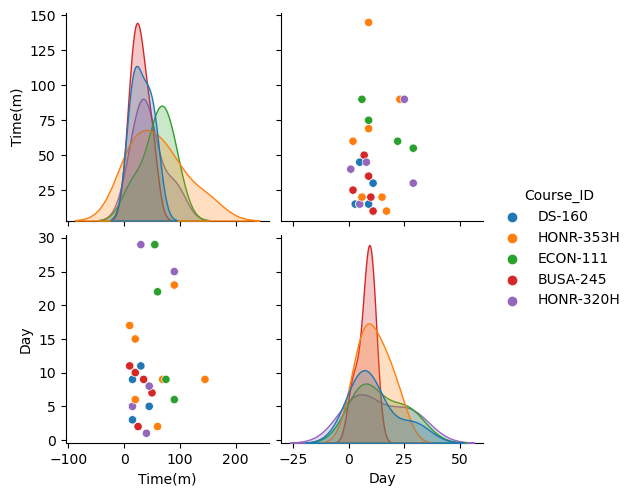

In [ ]:
pairplot = sns.pairplot(df, vars=["Time(m)","Day"],hue='Course_ID')

### Display the Heatmap and comment on your findings
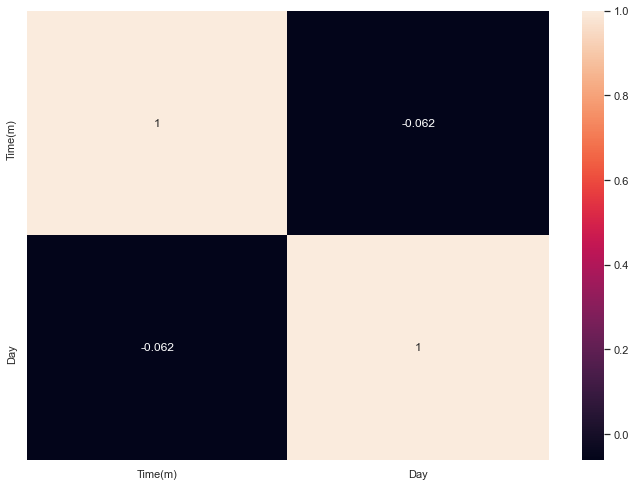

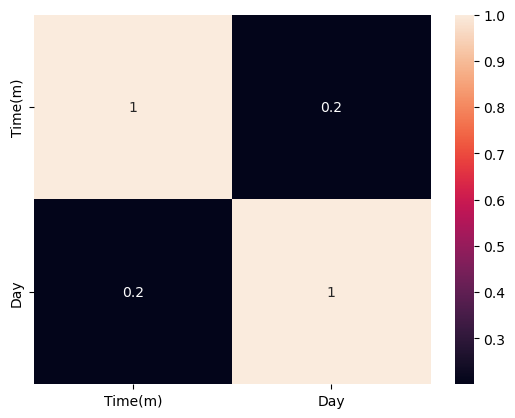

In [26]:
heatmap=sns.heatmap(df.corr(), annot=True)
plt.show()
# This heatmap shows the correlation between Day and Time spent. There is a weak relationship, as expected, between Time spent and the day of the month. This is evident by the correlation coefficient of 0.2, which is quite close to 0 indicating a weak relationship.